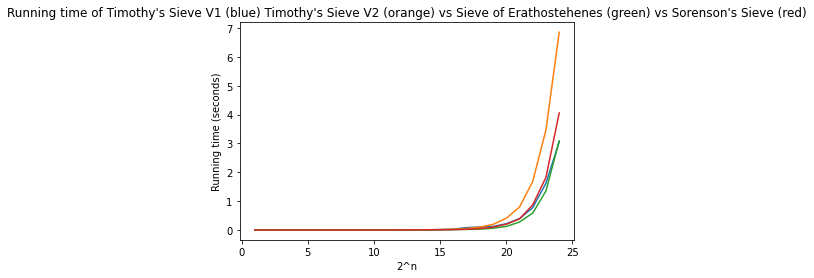

In [23]:
def what_form_is_prime(prime):
    if (prime + 1) % 6 == 0:
        return '-'
    return '+'


def timothys_sievev1(stop):
    primes = [2]
    n = 3
    composites_to_primes = {}
    stop_sqrt = sqrt(stop)
    while n < stop:
        if n in composites_to_primes:
            for prime in composites_to_primes[n]:
                if (n + prime) in composites_to_primes:
                    composites_to_primes[n + prime].append(prime)
                else:
                    composites_to_primes[n + prime] = [prime]
            del composites_to_primes[n]
        else:
            if n ** 2 < stop:
                composites_to_primes[n ** 2] = [n]
                primes.append(n)
        n += 2
    return primes

def timothys_sievev2(stop):
    primes = [2,3]
    add_next = 2
    n = 5
    composites_to_primes = {}
    stop_sqrt = sqrt(stop)
    while n < stop:
        if n in composites_to_primes:
            for prime in composites_to_primes[n]:
                if (n + prime) in composites_to_primes:
                    composites_to_primes[n + prime].append(prime)
                else:
                    composites_to_primes[n + prime] = [prime]
            del composites_to_primes[n]
        else:
            if not is_prime(n):
                print('ERROR', n)
            if n ** 2 < stop:
                composites_to_primes[n ** 2] = [6 * n]
                composites_to_primes[n * (n+2) if what_form_is_prime(n) == '-' else n * (n + 4)] = [6 * n]
                primes.append(n)
        n += 2 if add_next == 2 else 4
        add_next = 4 if add_next == 2 else 2
    return primes

def sieve_of_eratostehenes(n):
    """
    Returns a list of primes up to n using the Sieve of Eratosthenes algorithm.
    """
    primes = [True] * (n+1)
    primes[0], primes[1] = False, False
    
    for i in range(2, int(n**0.5)+1):
        if primes[i]:
            for j in range(i*i, n+1, i):
                primes[j] = False
    
    return [x for x in range(2, n+1) if primes[x]]

def sorenson_sieve(n):
    primes = []
    is_prime = [True] * (n+1)
    for p in range(2, n+1):
        if is_prime[p]:
            primes.append(p)
            for i in range(p**2, n+1, p):
                is_prime[i] = False
    return primes

import time
import psutil
import matplotlib.pyplot as plt

# Measure the running time of my_algorithm
def measure_running_time(algorithm, stop):
    mem_usage = []
    
    x = []
    y = []

    for i in range(1, stop):
        start_time = time.time()
        algorithm(2**i)
        elapsed_time = time.time() - start_time
        mem_usage.append(psutil.virtual_memory().percent)
        
        x.append(i)
        y.append(elapsed_time)
    # Plot the running time graph
    plt.plot(x, y)
    plt.xlabel('2^n')
    plt.ylabel('Running time (seconds)')
    plt.title("Running time of Timothy's Sieve V1 (blue) Timothy's Sieve V2 (orange) vs Sieve of Erathostehenes (green) vs Sorenson's Sieve (red)")
bits = 25
measure_running_time(timothys_sievev1, bits)
measure_running_time(timothys_sievev2, bits)
measure_running_time(sieve_of_eratostehenes, bits)

measure_running_time(sorenson_sieve, bits)